In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [214]:
#Reading Csv File

In [215]:
df = pd.read_csv('Kidney_Disease.csv')

In [216]:
#Displaying Top Rows

In [217]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [218]:
#Dropping Id column

In [219]:
df.drop('id', axis =1 , inplace= True)

In [220]:
# List the Columns

In [221]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [222]:
#Rename the Columns for better Understanding

In [223]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [224]:
# Statistical Data Table

In [225]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [226]:
#Checking for Null and Data Type of Each Column

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [228]:
#Seprating Categorical and Numerical Columns

In [229]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
num_cols = [col for col in df.columns if df[col].dtype != "object"]

In [230]:
#Printing Unique Values of each columns

In [231]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

packed_cell_volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values 

white_blood_cell_count has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '220

In [232]:
#Replace Unwanted Values

In [233]:
df['diabetes_mellitus'].replace(to_replace = {' yes':'yes', '\tyes': 'yes', '\tno': 'no'}, inplace = True)

In [234]:
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no')

In [235]:
df['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')

In [236]:
df['class'] = df['class'].map({'ckd': 0, 'notckd': 1}).astype(int)

In [237]:
df['packed_cell_volume'].replace(to_replace = {'\t?':'nan', '\t43': 43}, inplace = True)

In [238]:
df['white_blood_cell_count'].replace(to_replace = {'\t?':'nan', '\t6200':6200,'\t8400':8400}, inplace = True)

In [239]:
df['red_blood_cell_count'].replace(to_replace = {'\t?':'nan', '\t': ''}, inplace = True)

In [240]:
#Checking for Unwanted Values

In [241]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

packed_cell_volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' 'nan' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' 43 '47' '9' '49' '50' '53' '51'
 '54'] values 

white_blood_cell_count has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' 6200 '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' 8400 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800'
 

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [243]:
#Changing Data Type

In [244]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors = 'coerce')

In [245]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors = 'coerce')

df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors = 'coerce')

In [246]:
df['class'] = pd.to_numeric(df['class'], errors = 'coerce')

In [247]:
                                      #EXPLORATORY DATA ANALYSIS

In [248]:
#Univariate Analysis

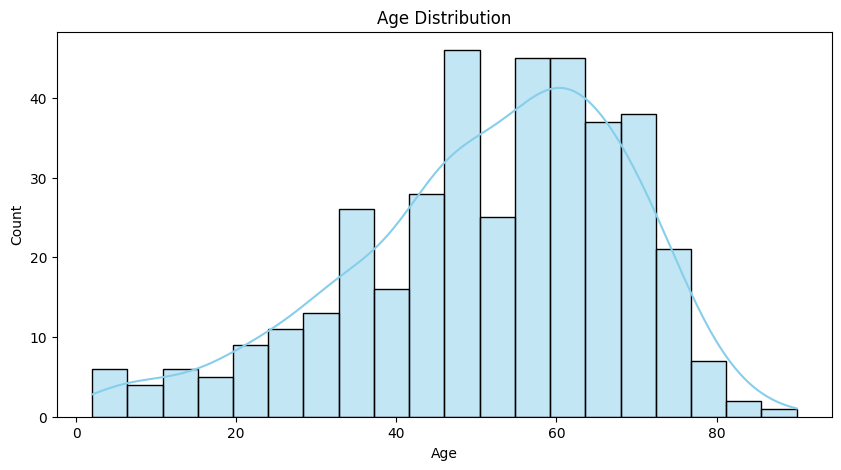

In [249]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'].dropna(), kde = True , bins = 20 , color = 'skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [250]:
#we can see that Distribution of age is right skewed

In [251]:
#Hypertension

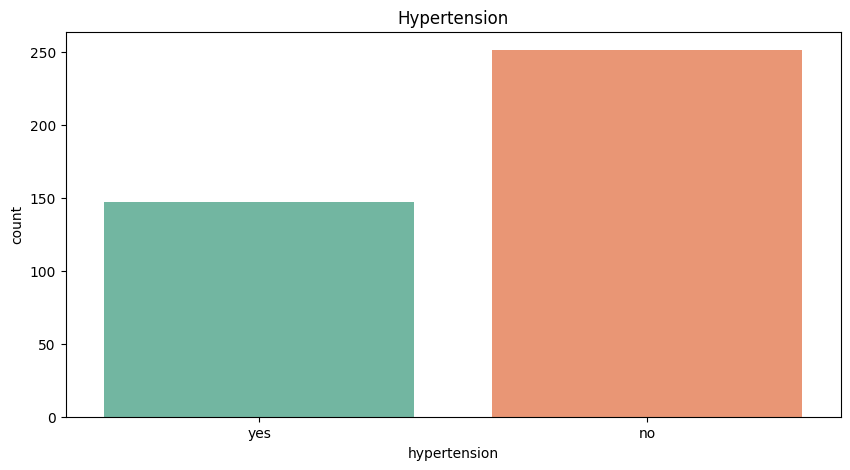

In [252]:
plt.figure(figsize=(10,5))
sns.countplot(x='hypertension', data=df,palette = 'Set2')
plt.title('Hypertension')
plt.show()

In [253]:
#Around 150 People Has hypertension

In [254]:
#Blood_urea Class wise

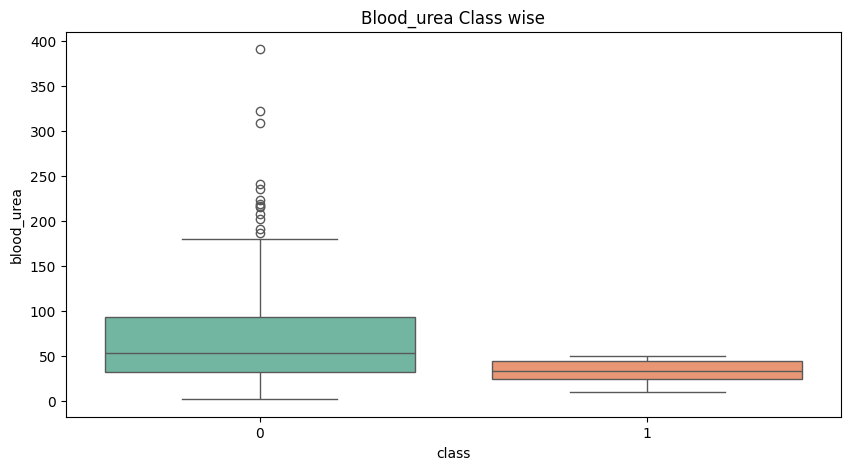

In [255]:
plt.figure(figsize=(10,5))
sns.boxplot(y='blood_urea', x='class', data=df, palette = 'Set2')
plt.title('Blood_urea Class wise')
plt.show()

In [256]:
# Class 1 Means People Don't have chronic disease
# Class 0 Means People have chronic disease
#Outlier is present in class 0
#Blooad_urea is higher in class 0 people
'''
Some of the most common chronic diseases include:
Heart disease
Cancer
Stroke
Diabetes
Arthritis
Chronic obstructive pulmonary disease (COPD)
Asthma
Mental health conditions like depression and anxiety
'''

'\nSome of the most common chronic diseases include:\nHeart disease\nCancer\nStroke\nDiabetes\nArthritis\nChronic obstructive pulmonary disease (COPD)\nAsthma\nMental health conditions like depression and anxiety\n'

In [257]:
#vIOLIN PLOT

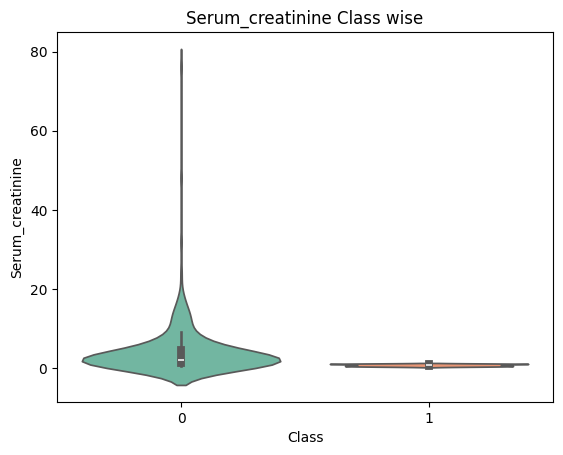

In [258]:
sns.violinplot(x = 'class' , y = 'serum_creatinine' , data = df , palette = 'Set2')
plt.xlabel('Class')
plt.ylabel('Serum_creatinine')
plt.title('Serum_creatinine Class wise')
plt.show()

In [259]:
'''
1)Serum creatinine is a waste product in your blood that comes from the breakdown of creatine, a molecule your muscles use for energy.
Healthy kidneys filter creatinine out of your blood and eliminate it through your urine.

2) High Level of this is not a Good Sign for Kidney

3) Class 0 people has high serum creatinine with some outliers
'''

'\n1)Serum creatinine is a waste product in your blood that comes from the breakdown of creatine, a molecule your muscles use for energy. \nHealthy kidneys filter creatinine out of your blood and eliminate it through your urine.\n\n2) High Level of this is not a Good Sign for Kidney\n\n3) Class 0 people has high serum creatinine with some outliers\n'

In [260]:
#Aanemia

Text(0.5, 1.0, 'Anemia Count')

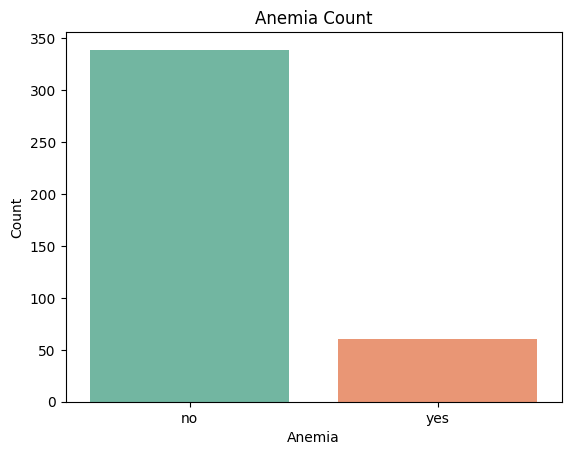

In [261]:
sns.countplot(x = 'aanemia' , data = df , palette = 'Set2')
plt.xlabel('Anemia')
plt.ylabel('Count')
plt.title('Anemia Count')

In [262]:
'''
Anemia is a blood disorder characterized by a deficiency of red blood cells (RBCs) or hemoglobin,
the protein within RBCs that carries oxygen throughout your body.
This deficiency leads to a reduction in the amount of oxygen delivered to your tissues.
There are only 60 People with Anemia
'''

'\nAnemia is a blood disorder characterized by a deficiency of red blood cells (RBCs) or hemoglobin, \nthe protein within RBCs that carries oxygen throughout your body. \nThis deficiency leads to a reduction in the amount of oxygen delivered to your tissues.\nThere are only 60 People with Anemia\n'

In [263]:
#Appetite

<Axes: ylabel='count'>

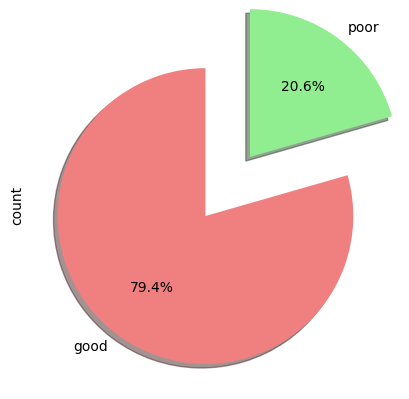

In [264]:
df.appetite.value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'lightgreen'], explode = (0.1, 0.4), startangle = 90, shadow = True)

In [265]:
#79.4 Percentage have Healthy Appetite
#20.6 people have lower Appetite

In [266]:
# pus_cell_clumps

Text(0.5, 1.0, 'pus_cell_clumps Count')

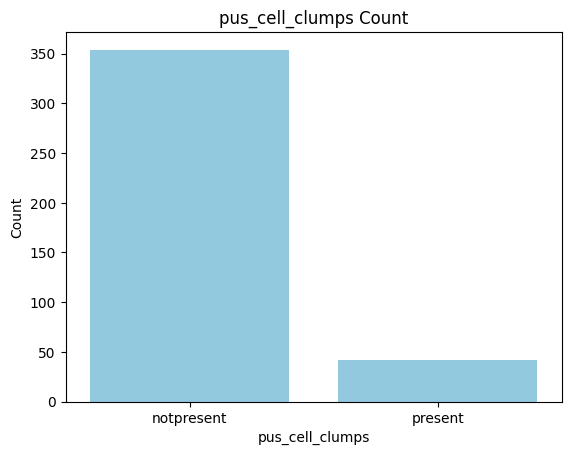

In [267]:
sns.countplot(x = 'pus_cell_clumps', data = df , color = 'skyblue')
plt.xlabel('pus_cell_clumps')
plt.ylabel('Count')
plt.title('pus_cell_clumps Count')

In [268]:
#pus_cell_clumps is not present in most of the people

In [269]:
#White-Blood-Cells

<Axes: xlabel='white_blood_cell_count', ylabel='Count'>

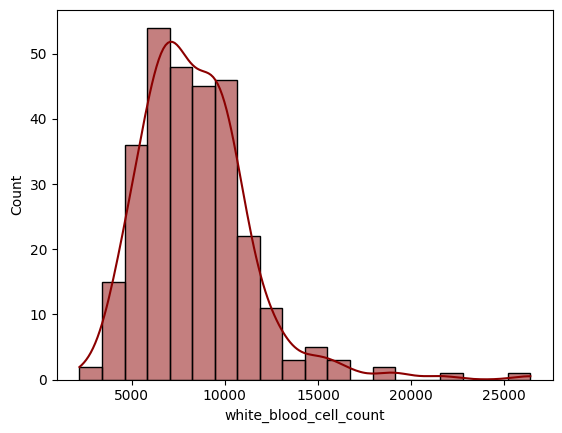

In [270]:
sns.histplot(df['white_blood_cell_count'].dropna(), bins = 20, kde = True, color = 'darkred')

In [271]:
#Around 150 Peoples have the White Blood cell count between 5000 to 10000

In [272]:
#diabetes_mellitus

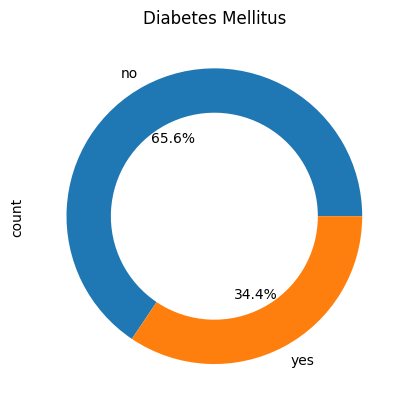

In [273]:
df['diabetes_mellitus'].value_counts().plot.pie(autopct = "%1.1f%%", wedgeprops = dict(width=0.3))
plt.title('Diabetes Mellitus')
plt.show()

In [274]:
#65.5 People have Daibetes

In [275]:
#Bacteria

Text(0.5, 1.0, 'Bacteria Count')

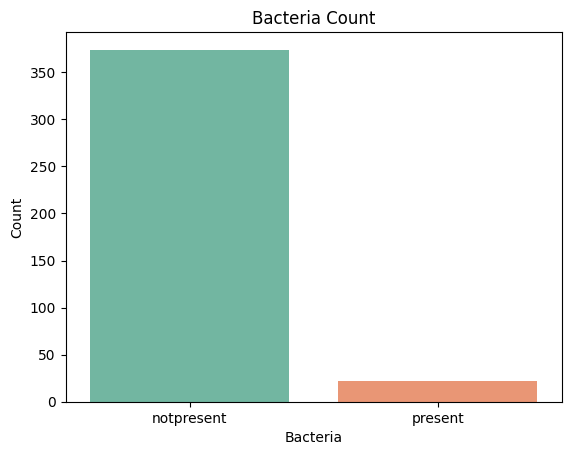

In [276]:
sns.countplot(x = 'bacteria', data=df, palette = 'Set2')
plt.xlabel('Bacteria')
plt.ylabel('Count')
plt.title('Bacteria Count')

In [277]:
                                        #BIVARIATE ANALYSIS

In [278]:
#Age wise Blood Pressure

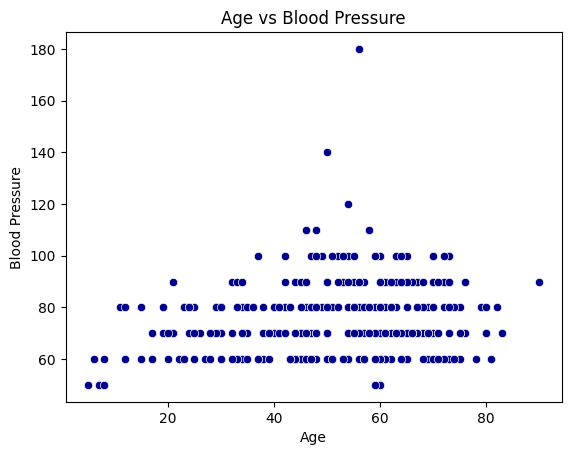

In [279]:
sns.scatterplot(x = 'age', y = 'blood_pressure', data = df, color = 'darkblue')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs Blood Pressure')
plt.show()

In [280]:
#With Increase in Age Blooad Presure also increasing wit hsome outliers

In [281]:
#Class wise Blood Pressure across different Age

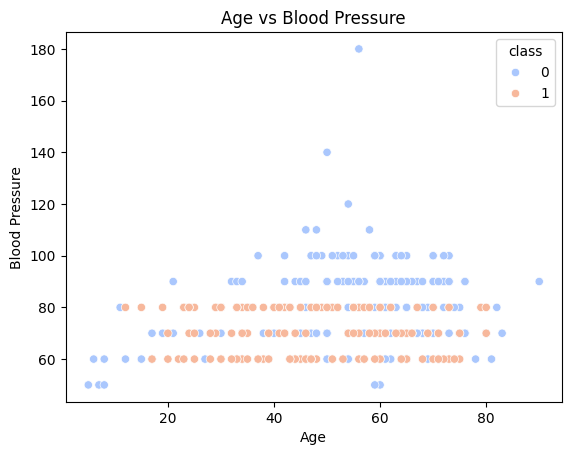

In [282]:
sns.scatterplot(x = 'age', y = 'blood_pressure', data = df, hue = 'class', palette = 'coolwarm')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs Blood Pressure')
plt.show()

In [283]:
#Class 0 People has higher blood pressure than class 1

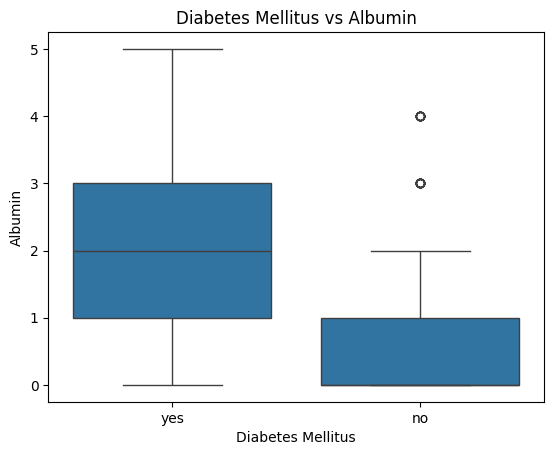

In [284]:
sns.boxplot(x = 'diabetes_mellitus', y = 'albumin', data =df)
plt.xlabel('Diabetes Mellitus')
plt.ylabel('Albumin')
plt.title('Diabetes Mellitus vs Albumin')
plt.show()

In [285]:
#People having Diabetes have more Albumin

In [286]:
# Diabetes Vs HyperTension

<Axes: xlabel='diabetes_mellitus'>

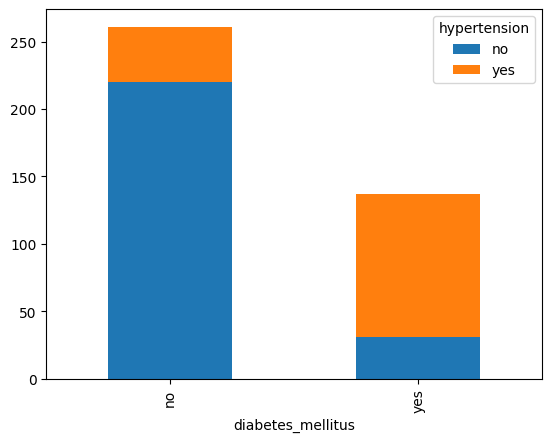

In [287]:
#stacked bar chart
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])

diabetes_hypertension.plot(kind = 'bar', stacked = True)

In [288]:
# The People having Diabetes has the higher chances of being Hypertension

In [289]:
                                       #MULTIVARIATE ANALYSIS

In [290]:
#Pairplot

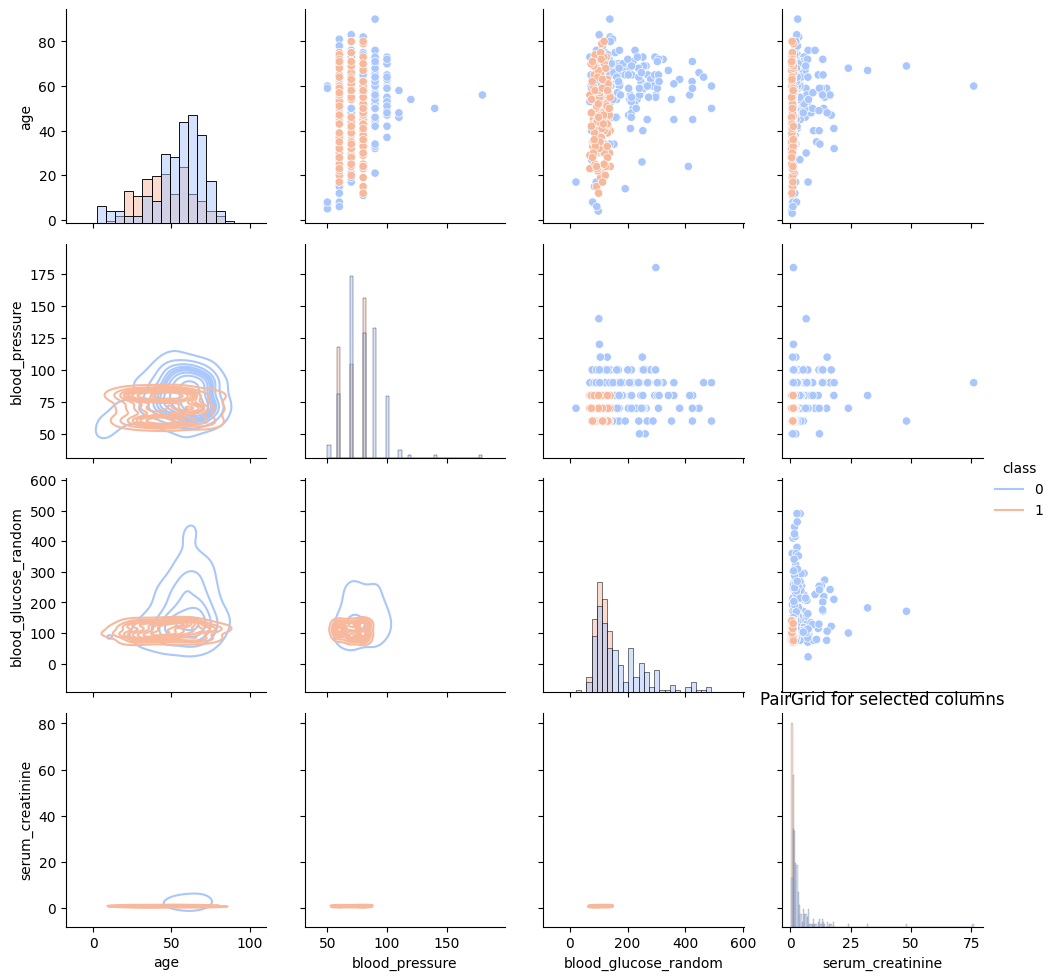

In [291]:
cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']

g = sns.PairGrid(df[cols], hue='class', palette = 'coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.map_diag(sns.histplot)
g.add_legend()
plt.title("PairGrid for selected columns")
plt.show()

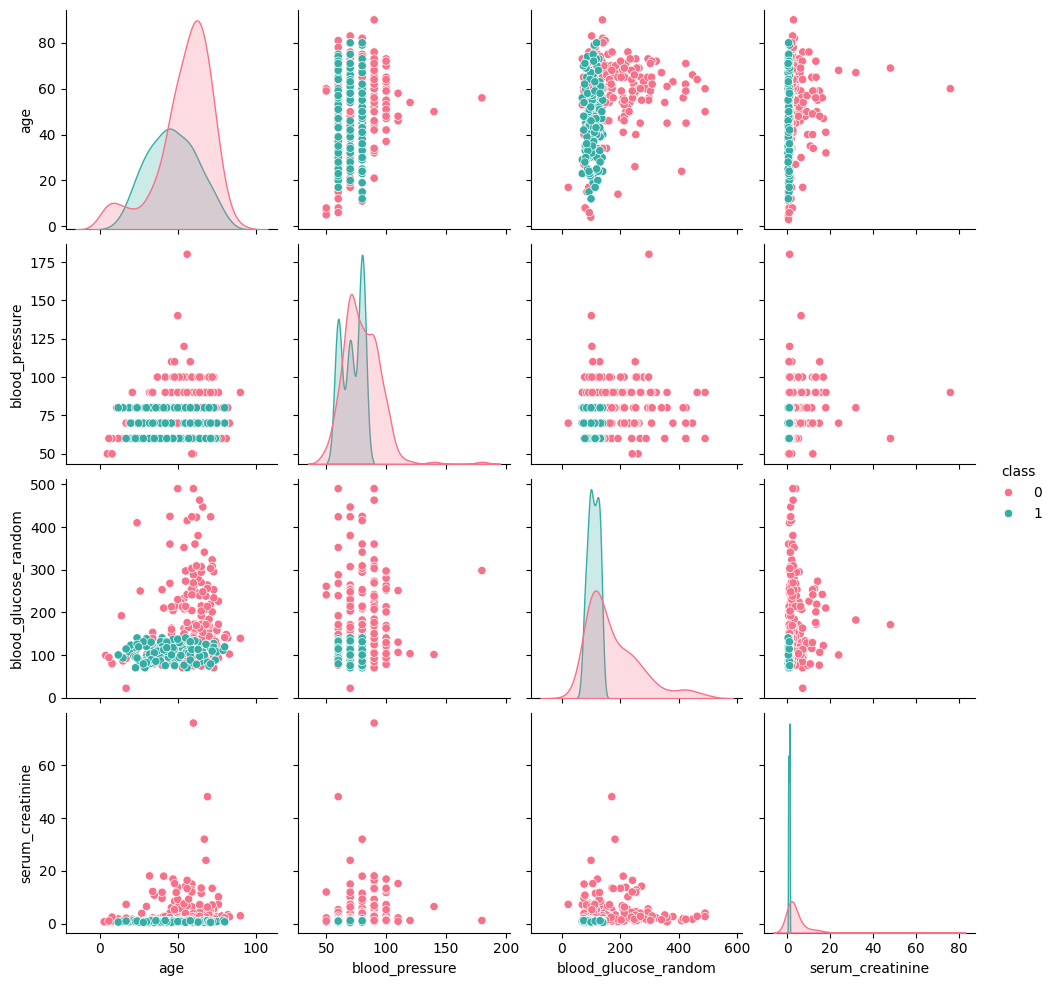

In [292]:
cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']
sns.pairplot(df[cols], hue = 'class', palette = 'husl')

In [293]:
#Correaltion tells the relation b/w two continous Variable , it ranges from low to high i.e -1 to 1

<Axes: >

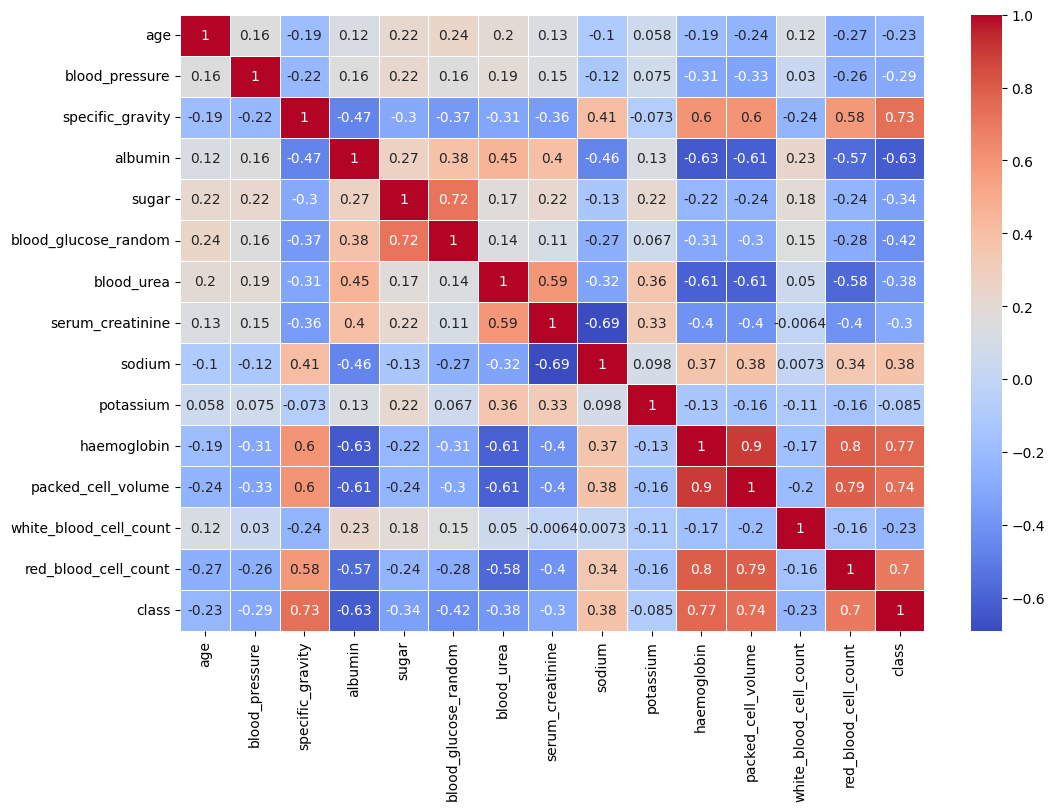

In [294]:
corr = df.corr(numeric_only=True)
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = .5)

<Axes: xlabel='diabetes_mellitus', ylabel='age'>

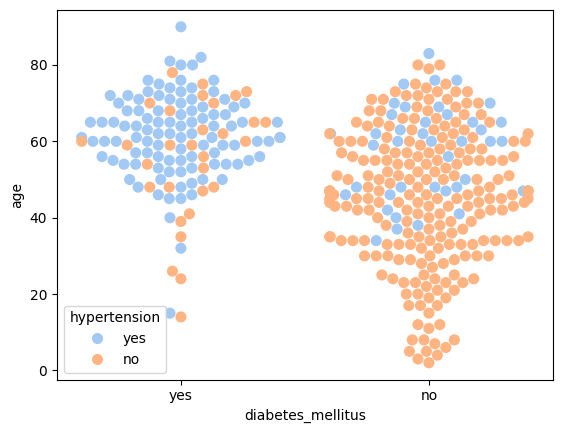

In [295]:
sns.swarmplot(x='diabetes_mellitus', y='age', hue='hypertension', data=df, palette='pastel', size=8)

In [296]:
fig = px.scatter(df, x = 'age', y = 'blood_pressure', color = 'class', hover_data = ['serum_creatinine', 'haemoglobin'],title = "interactive scatterplot with hover information")
fig.show()

In [297]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [298]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [299]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin']

In [300]:
#Median

In [301]:
med = df[num_cols].median()
med

age                      55.00
blood_pressure           80.00
specific_gravity          1.02
albumin                   0.00
sugar                     0.00
blood_glucose_random    121.00
blood_urea               42.00
serum_creatinine          1.30
sodium                  138.00
potassium                 4.40
haemoglobin              12.65
dtype: float64

In [302]:
df[num_cols] = df[num_cols].fillna(med)

In [303]:
df.isnull().sum()

age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
haemoglobin                  0
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [306]:
mode_values = df.mode().iloc[0]
df[cat_cols] = df[cat_cols].fillna(mode_values)

In [307]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                        int64
dtype: object

In [308]:
'''
END
'''

'\nEND\n'